In [37]:
# Importanto a base da bolsa considerando o período de 01/01/2023 até 16/01/2024

import yfinance as yf

symbol = '^BVSP'
start_date = '2023-01-01'
end_date = '2024-01-20'

In [38]:
# Pegando os dados importados e colocando em um DF

df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [39]:
# Criando csv com os dados importados

csv_filename = 'dadosBolsa.csv'
df.to_csv(csv_filename)

# Agora só olhar ali nos arquivos que verá o csv

In [40]:
# Importanto a lib do pandas

import pandas as pd

In [41]:
# Conhecendo mais sobre a nossa base e tratando

df = pd.read_csv("dadosBolsa.csv", sep=",")

In [42]:
# Com a função info() conseguimos ver detalhes, tipos sobre a nossa base

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [43]:
# Com o shape conseguimos ver a quantidade de linhas e colunas

df.shape

(262, 7)

In [44]:
# Com a função head() pegamos as cinco primeiras linhas da base, caso queria uma quantidade específica só colocar nos parenteses, por ex: df.head(3) viriam somente três linhas

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,109734.0,109734.0,105981.0,106376.0,106376.0,8130500
1,2023-01-03,106377.0,106684.0,103852.0,104166.0,104166.0,14466700
2,2023-01-04,104167.0,105627.0,103915.0,105334.0,105334.0,14451200
3,2023-01-05,105336.0,107743.0,105333.0,107518.0,107518.0,15512000
4,2023-01-06,107642.0,109433.0,107642.0,108836.0,108836.0,12626600


In [45]:
# Verificando se há dados nulos na base, mesmo com a info() já mostrando, é bom certificar

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [46]:
# Verificando se há  dados duplicados na base

df.duplicated().sum()

0

In [47]:
# Com a função describe() conseguimos ver infos da nossa base como a média (mean), desvio padrão (std)

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,2.620000e+02
mean,115013.919847,115904.000000,114213.167939,115074.583969,115074.583969,1.161466e+07
std,8514.852147,8432.980835,8593.281418,8544.494659,8544.494659,3.408420e+06
min,97926.000000,99258.000000,96997.000000,97926.000000,97926.000000,0.000000e+00
25%,108570.250000,109606.500000,107676.750000,108470.500000,108470.500000,9.850400e+06
50%,115446.500000,116158.500000,114825.000000,115540.000000,115540.000000,1.149930e+07
75%,119253.000000,119872.250000,118459.500000,119267.000000,119267.000000,1.352698e+07
max,134194.000000,134392.000000,133832.000000,134194.000000,134194.000000,1.985300e+07


In [48]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,109734.0,109734.0,105981.0,106376.0,106376.0,8130500
1,2023-01-03,106377.0,106684.0,103852.0,104166.0,104166.0,14466700
2,2023-01-04,104167.0,105627.0,103915.0,105334.0,105334.0,14451200
3,2023-01-05,105336.0,107743.0,105333.0,107518.0,107518.0,15512000
4,2023-01-06,107642.0,109433.0,107642.0,108836.0,108836.0,12626600


In [49]:
# Iniciando algumas análises - Para as análises podemos usar algumas libs

import seaborn as sns
import matplotlib.pyplot as plt

df_limpo = df                                                              # cópia do dataframe
df_limpo['Date'] = pd.to_datetime(df_limpo['Date'])                        # transformando em datetime
df_limpo = df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close']) # Removendo colunas desnecessárias
df_limpo = df_limpo.set_index('Date')                                      # definindo data como índice


In [50]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,109734.0,109734.0,105981.0,106376.0,106376.0,8130500
1,2023-01-03,106377.0,106684.0,103852.0,104166.0,104166.0,14466700
2,2023-01-04,104167.0,105627.0,103915.0,105334.0,105334.0,14451200
3,2023-01-05,105336.0,107743.0,105333.0,107518.0,107518.0,15512000
4,2023-01-06,107642.0,109433.0,107642.0,108836.0,108836.0,12626600
...,...,...,...,...,...,...,...
257,2024-01-15,130988.0,131606.0,130253.0,131521.0,131521.0,5746600
258,2024-01-16,131515.0,131517.0,129147.0,129294.0,129294.0,11911300
259,2024-01-17,129293.0,129296.0,128312.0,128524.0,128524.0,9952500
260,2024-01-18,128524.0,129047.0,127316.0,127316.0,127316.0,12460800


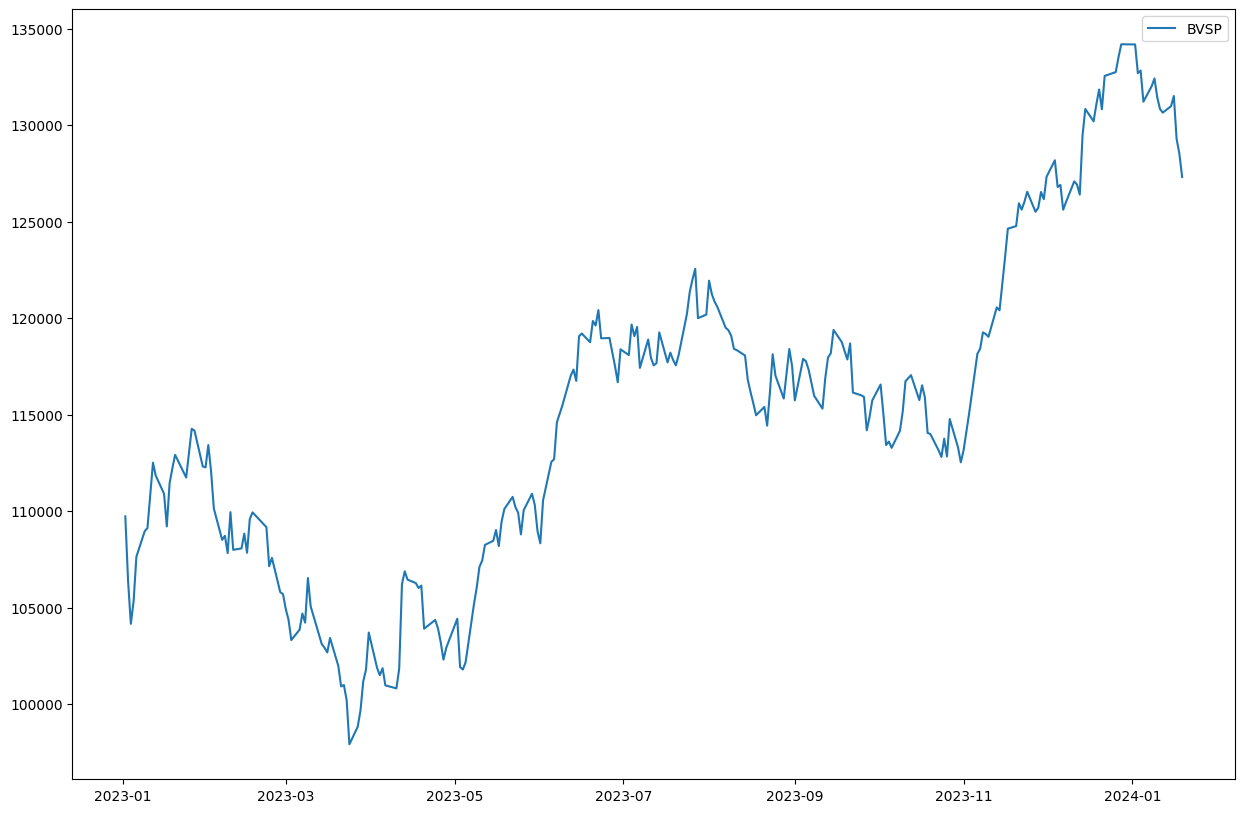

In [57]:
# Relação Date x Open (selecionar um período)

plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['Open'], label='BVSP')
plt.legend(loc='best')
plt.show()

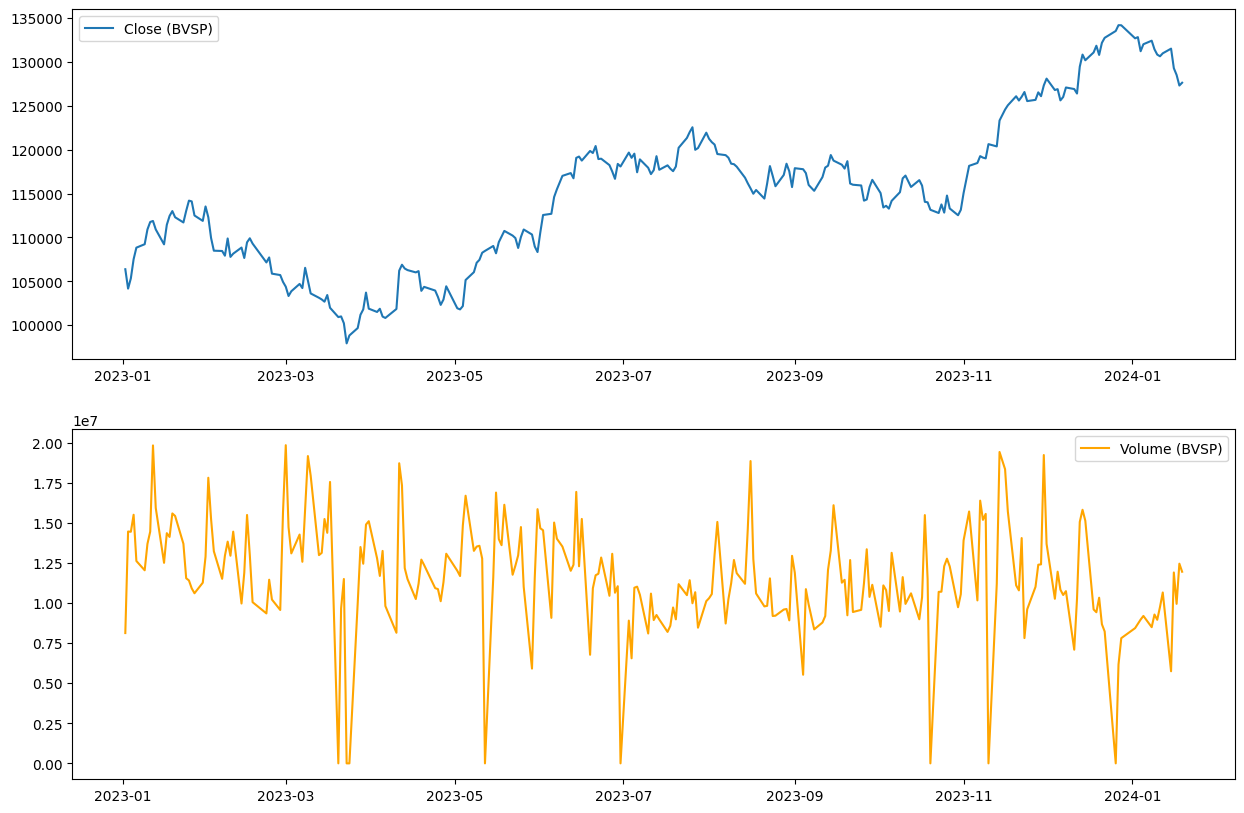

In [59]:
# Relação Date x Close x Volume (selecionar um período)

plt.figure(figsize = (15,10))

# Primeiro subplot para o Close
plt.subplot(2, 1, 1)
plt.plot(df['Date'], df['Close'], label='Close (BVSP)')
plt.legend(loc='best')

# Segundo subplot para o Volume
plt.subplot(2, 1, 2)
plt.plot(df['Date'], df['Volume'], label='Volume (BVSP)', color='orange')
plt.legend(loc='best')

plt.show()

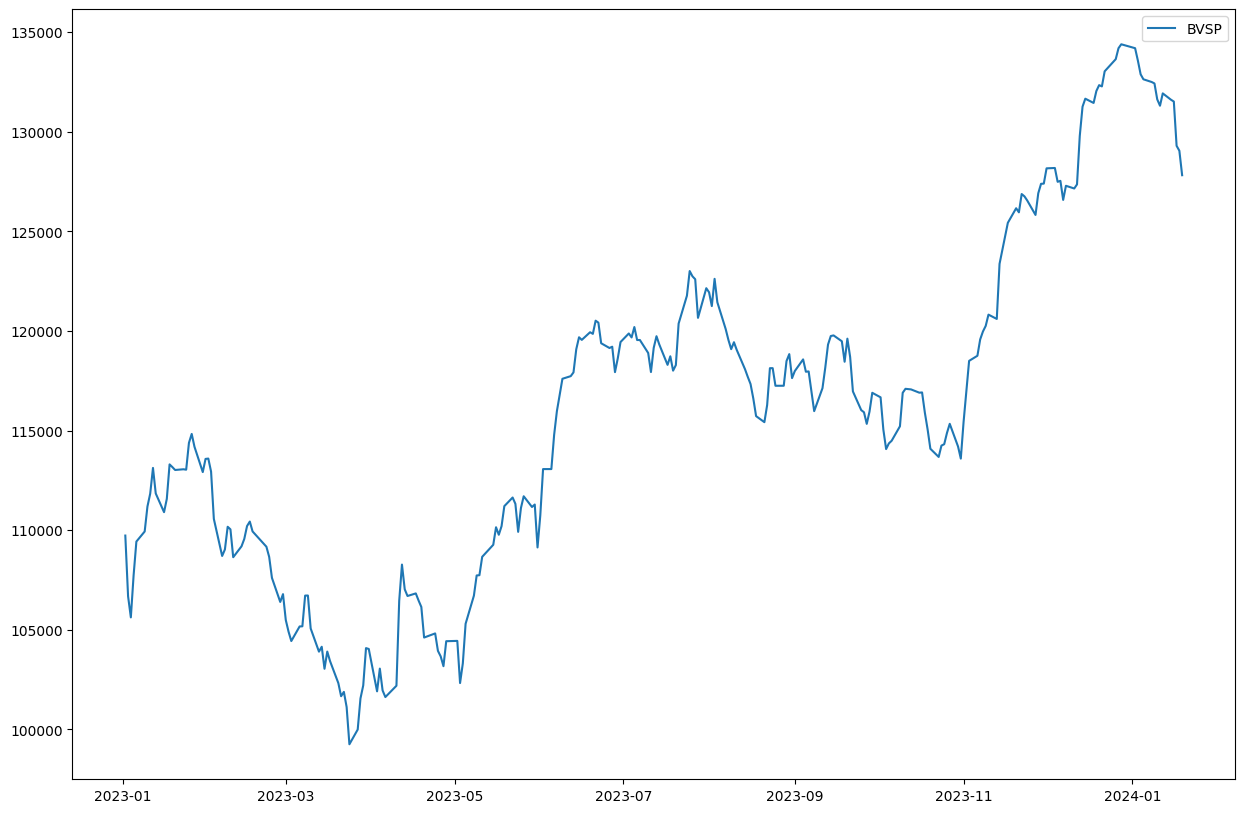

In [60]:
# Relação Date x High (selecionar um período)

plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['High'], label='BVSP')

plt.legend(loc='best')
plt.show()

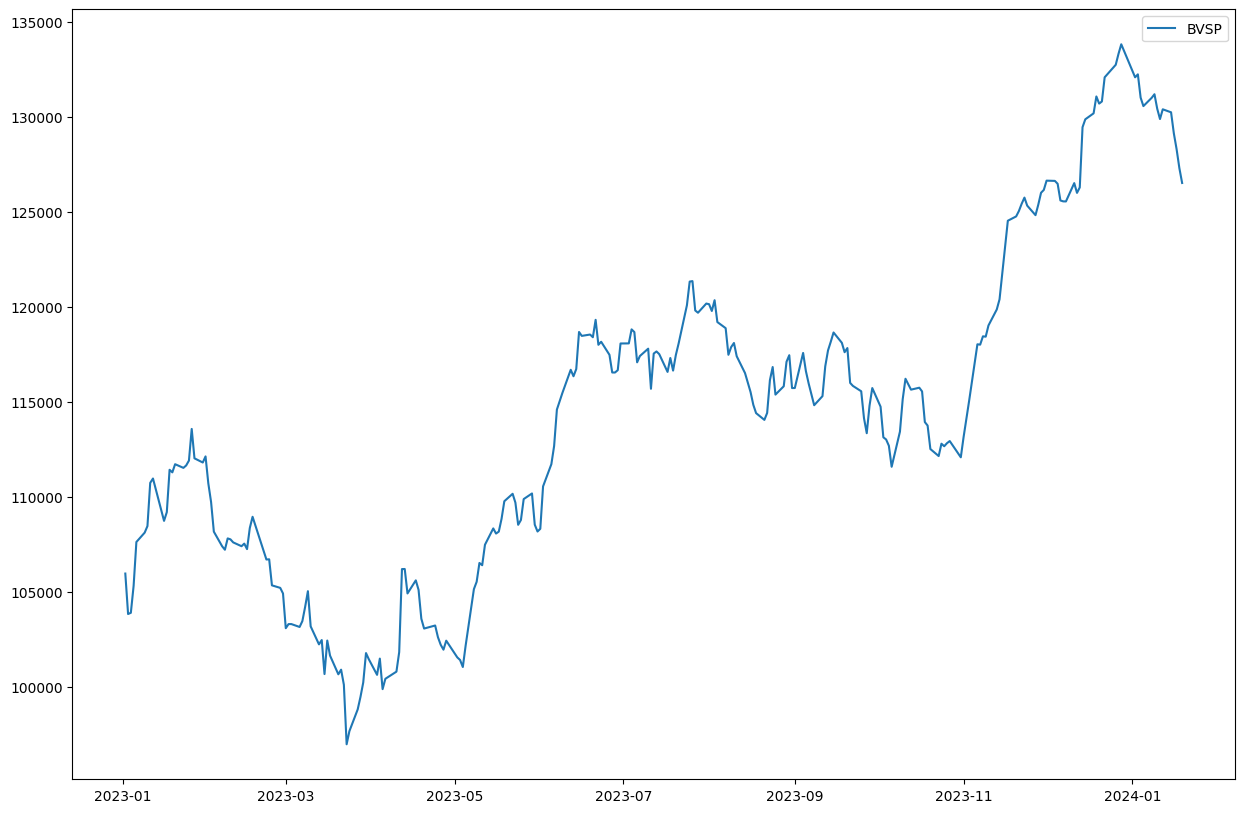

In [61]:
# Relação Date x Low (selecionar um período)

plt.figure(figsize = (15,10))
plt.plot(df['Date'], df['Low'], label='BVSP')

plt.legend(loc='best')
plt.show()

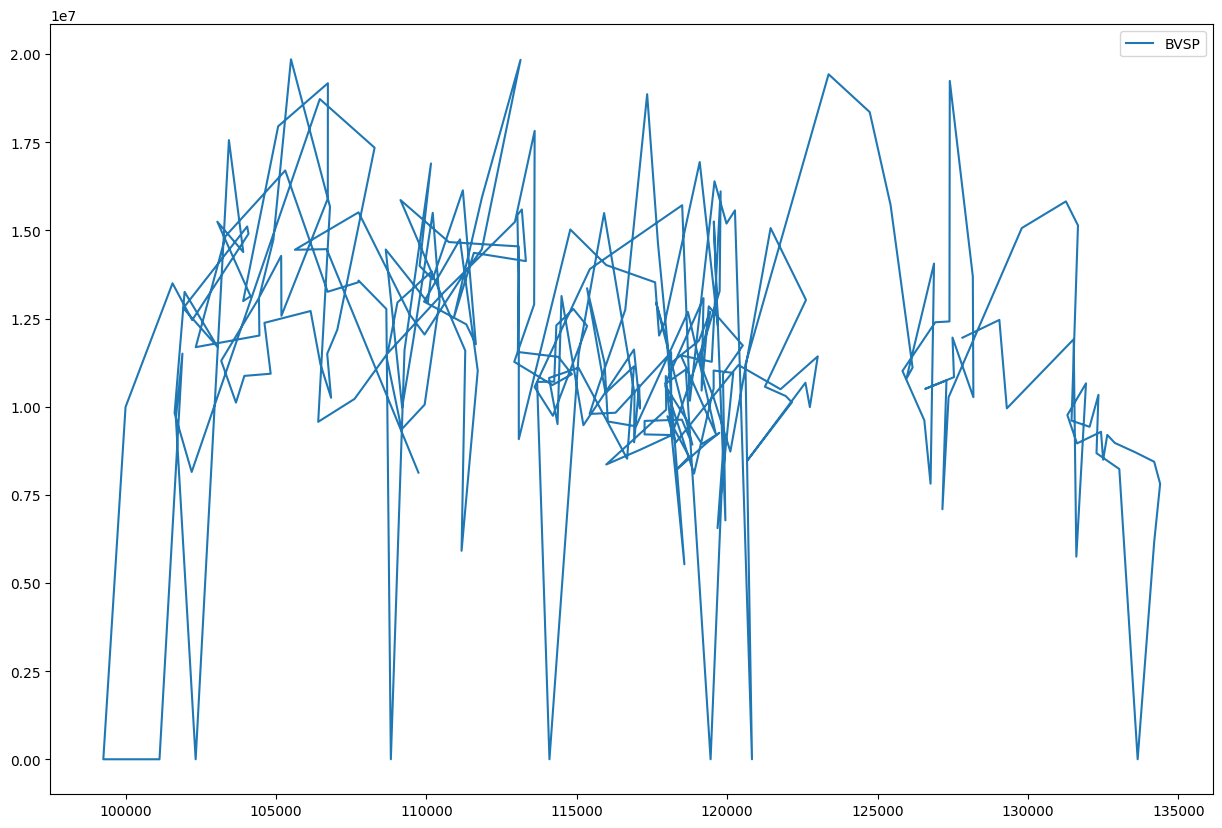

In [64]:
# Relação High x Volume (selecionar um período) - deixei Date no inicio

plt.figure(figsize = (15,10))
plt.plot(df['High'], df['Volume'], label='BVSP')

plt.legend(loc='best')
plt.show()


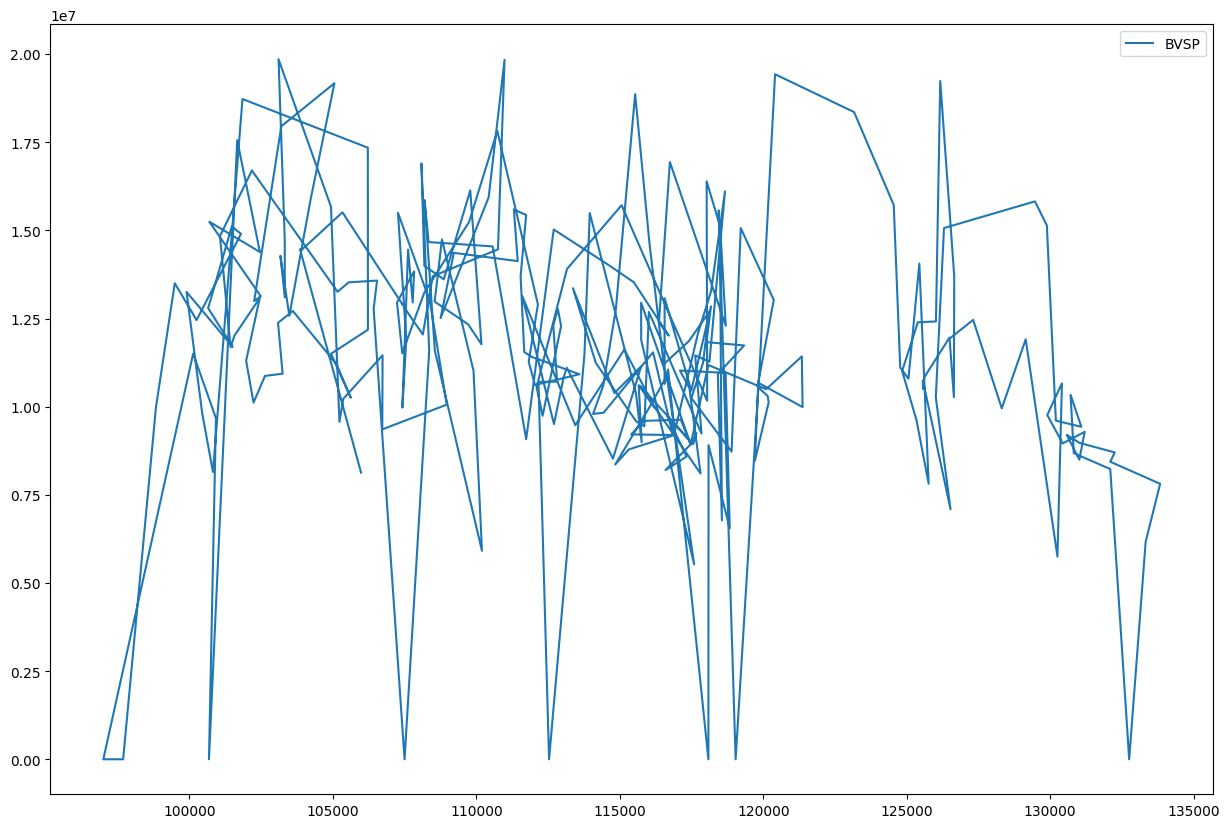

In [65]:
# Relação Low x Volume (selecionar um período)

plt.figure(figsize = (15,10))
plt.plot(df['Low'], df['Volume'], label='BVSP')

plt.legend(loc='best')
plt.show()